In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget

def read_omg_csv(path_palm_data: str, 
                 n_omg_channels: int = 50, 
                 n_acc_channels: int = 3, 
                 n_gyr_channels: int = 3,
                 n_enc_channels: int = 6,
                 n_mag_channels: int = 0, 
                 button_ch: bool = True, 
                 sync_ch: bool = True, 
                 timestamp_ch: bool = True) -> pd.DataFrame:
    
    '''
    Reads CSV data for OMG data
    NB: data must be separated by " " separator

        Parameters:
                path_palm_data  (str): path to csv data file
                n_omg_channels  (int): Number of OMG channels
                n_acc_channels  (int): Number of Accelerometer channels, default = 0
                n_gyr_channels  (int): Number of Gyroscope channels, default = 0
                n_mag_channels  (int): Number of Magnetometer channels, default = 0
                n_enc_channels  (int): Number of Encoder channels, default = 0
                button_ch      (bool): If button channel is present, default = True
                sync_ch        (bool): If synchronization channel is present, default = True
                timestamp_ch   (bool): If timestamp channel is present, default = True

        Returns:
                df_raw (pd.DataFrame): Parsed pandas Dataframe with OMG data
    '''
    
    df_raw = pd.read_csv(path_palm_data, sep=' ', 
                         header=None, 
                         skipfooter=1, 
                         skiprows=1, 
                         engine='python')
    columns = np.arange(n_omg_channels).astype('str').tolist()
    
    for label, label_count in zip(['ACC', 'GYR', 'MAG', 'ENC'], 
                                  [n_acc_channels, n_gyr_channels, n_mag_channels, n_enc_channels]):
        columns = columns + ['{}{}'.format(label, i) for i in range(label_count)]
        
    if button_ch:
        columns = columns + ['BUTTON']
        
    if sync_ch:
        columns = columns + ['SYNC']
        
    if timestamp_ch:
        columns = columns + ['ts']
        
    df_raw.columns = columns
    
    return df_raw

sprint1_pilote1_gestures = read_omg_csv('sprint1_pilote1_gestures.palm')
sprint2_pilote1_gestures = read_omg_csv('sprint2_pilote1_gestures.palm')
sprint2_pilote2_gestures = read_omg_csv('sprint2_pilote2_gestures.palm')
sprint3_pilote1_mount1_gestures = read_omg_csv('sprint3_pilote1_mount1_gestures.palm')
sprint3_pilote1_mount2_gestures = read_omg_csv('sprint3_pilote1_mount2_gestures.palm')

sprint1_pilote1_gestures_protocol = pd.read_csv('sprint1_pilote1_gestures.palm.protocol.csv')
sprint2_pilote1_gestures_protocol = pd.read_csv('sprint2_pilote1_gestures.palm.protocol.csv')
sprint2_pilote2_gestures_protocol = pd.read_csv('sprint2_pilote2_gestures.palm.protocol.csv')
sprint3_pilote1_mount1_gestures_protocol = pd.read_csv('sprint3_pilote1_mount1_gestures.palm.protocol.csv')
sprint3_pilote1_mount2_gestures_protocol = pd.read_csv('sprint3_pilote1_mount2_gestures.palm.protocol.csv')

sprint2_pilote1_fingers = read_omg_csv('sprint2_pilote1_fingers.palm')
sprint2_pilote2_fingers = read_omg_csv('sprint2_pilote2_fingers.palm')


OMG_CH = [str(i) for i in range(50)]
GLOVE_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']

# Соединим данные 2-х пилотов
X_gestures = np.vstack([
    sprint1_pilote1_gestures[OMG_CH].values,
    sprint2_pilote1_gestures[OMG_CH].values,
    sprint2_pilote2_gestures[OMG_CH].values,
    sprint3_pilote1_mount1_gestures[OMG_CH].values,
    sprint3_pilote1_mount2_gestures[OMG_CH].values,
    ])
y_gestures = np.vstack([
    sprint1_pilote1_gestures[GLOVE_CH].values,
    sprint2_pilote1_gestures[GLOVE_CH].values,
    sprint2_pilote2_gestures[GLOVE_CH].values,
    sprint3_pilote1_mount1_gestures[GLOVE_CH].values,
    sprint3_pilote1_mount2_gestures[GLOVE_CH].values,
    ])

X_fingers = np.vstack([
    sprint2_pilote1_fingers[OMG_CH], 
    sprint2_pilote2_fingers[OMG_CH]
    ])
y_fingers = np.vstack([
    sprint2_pilote1_fingers[GLOVE_CH], 
    sprint2_pilote2_fingers[GLOVE_CH]
    ])

X_gestures.shape, y_gestures.shape, X_fingers.shape, y_fingers.shape

((144795, 50), (144795, 6), (31307, 50), (31307, 6))

In [2]:
merged_1 = sprint1_pilote1_gestures.merge(sprint1_pilote1_gestures_protocol, how='left', left_on='SYNC', right_on='epoch')
merged_2 = sprint2_pilote1_gestures.merge(sprint2_pilote1_gestures_protocol, how='left', left_on='SYNC', right_on='epoch')
merged_3 = sprint2_pilote2_gestures.merge(sprint2_pilote2_gestures_protocol, how='left', left_on='SYNC', right_on='epoch')
merged_4 = sprint3_pilote1_mount1_gestures.merge(sprint3_pilote1_mount1_gestures_protocol, how='left', left_on='SYNC', right_on='epoch')
merged_5 = sprint3_pilote1_mount2_gestures.merge(sprint3_pilote1_mount2_gestures_protocol, how='left', left_on='SYNC', right_on='epoch')

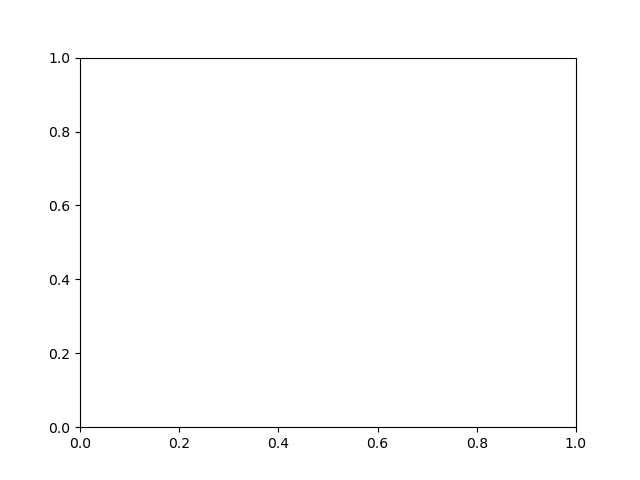

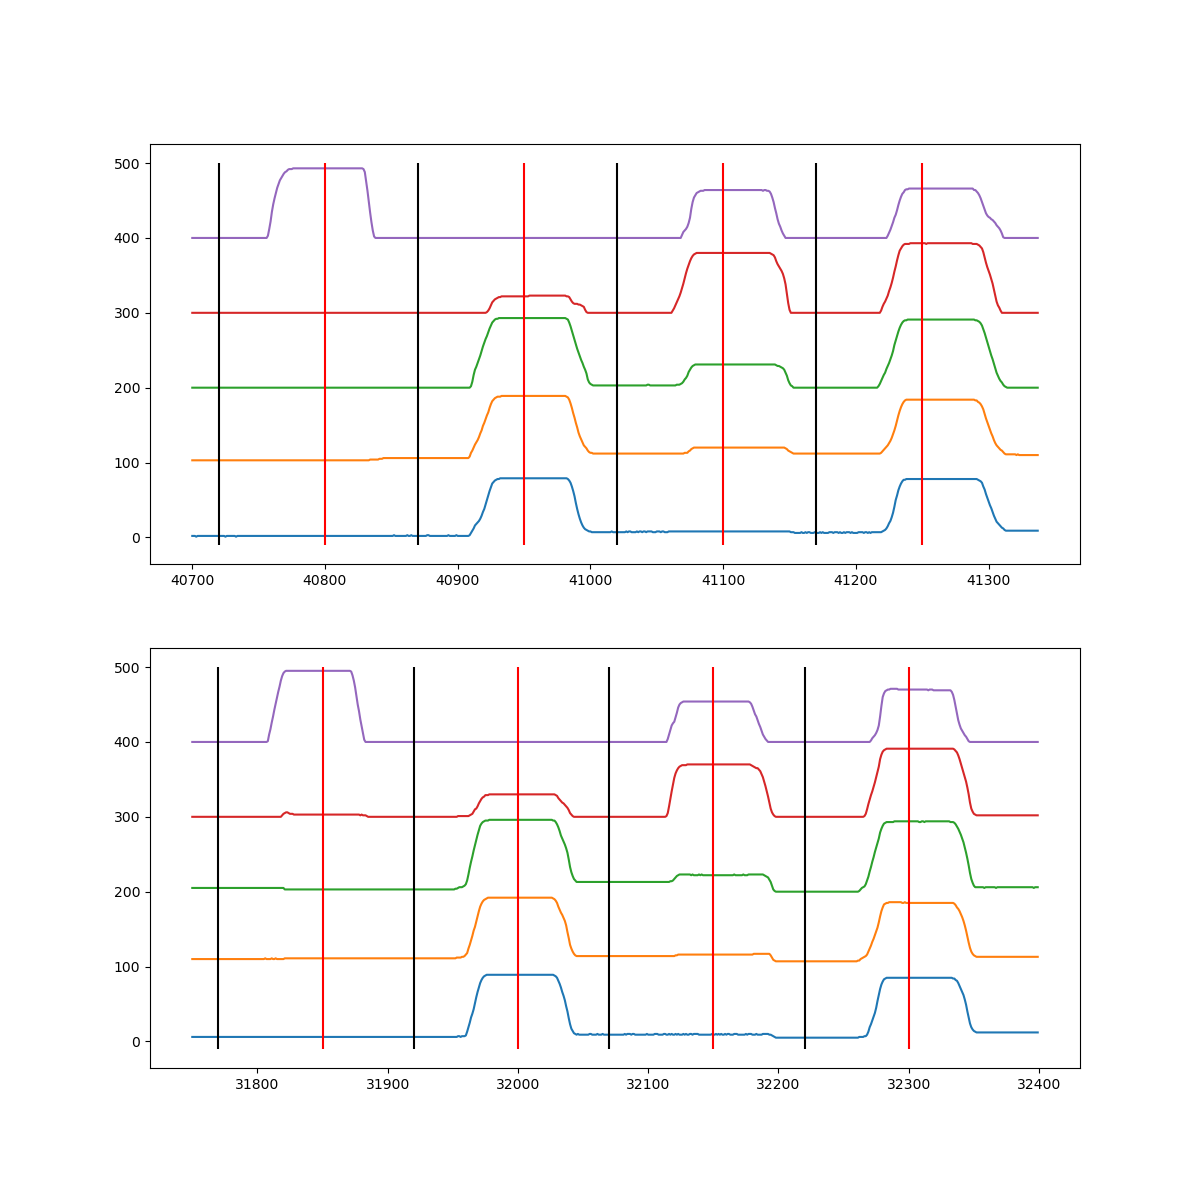

In [3]:
plt.clf()
plt.cla()
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(merged_1[['ENC0']].iloc[40700:])
ax[0].plot(merged_1[['ENC1']].iloc[40700:] + 100)
ax[0].plot(merged_1[['ENC2']].iloc[40700:] + 200)
ax[0].plot(merged_1[['ENC3']].iloc[40700:] + 300)
ax[0].plot(merged_1[['ENC4']].iloc[40700:] + 400)

ax[0].vlines(40800, -10, 500, color='red')
ax[0].vlines(40950, -10, 500, color='red')
ax[0].vlines(41100, -10, 500, color='red')
ax[0].vlines(41250, -10, 500, color='red')

ax[0].vlines(40720, -10, 500, color='black')
ax[0].vlines(40870, -10, 500, color='black')
ax[0].vlines(41020, -10, 500, color='black')
ax[0].vlines(41170, -10, 500, color='black')

ax[1].plot(merged_1[['ENC0']].iloc[31750:32400])
ax[1].plot(merged_1[['ENC1']].iloc[31750:32400] + 100)
ax[1].plot(merged_1[['ENC2']].iloc[31750:32400] + 200)
ax[1].plot(merged_1[['ENC3']].iloc[31750:32400] + 300)
ax[1].plot(merged_1[['ENC4']].iloc[31750:32400] + 400)

ax[1].vlines(31850, -10, 500, color='red')
ax[1].vlines(32000, -10, 500, color='red')
ax[1].vlines(32150, -10, 500, color='red')
ax[1].vlines(32300, -10, 500, color='red')

ax[1].vlines(31770, -10, 500, color='black')
ax[1].vlines(31920, -10, 500, color='black')
ax[1].vlines(32070, -10, 500, color='black')
ax[1].vlines(32220, -10, 500, color='black')

In [4]:
merged_1[OMG_CH].values[31850] #thumb
merged_1[OMG_CH].values[40800] #thumb
merged_1[OMG_CH].values[32000] #pistol
merged_1[OMG_CH].values[40950] #pistol
merged_1[OMG_CH].values[32150] #ok
merged_1[OMG_CH].values[41100] #ok
merged_1[OMG_CH].values[32300] #grab
merged_1[OMG_CH].values[41250] #grab

merged_1[OMG_CH].values[31770] #relax
merged_1[OMG_CH].values[40720] #relax
merged_1[OMG_CH].values[31920] #relax
merged_1[OMG_CH].values[40870] #relax
merged_1[OMG_CH].values[32070] #relax
merged_1[OMG_CH].values[41020] #relax
merged_1[OMG_CH].values[32220] #relax
merged_1[OMG_CH].values[41170] #relax

array([1150,   49, 1637,   96,    6, 2418,   27,   28, 1863,   49,   37,
         32, 2575,   21,   52, 2746,   11,  963,   61, 2875,   10, 2574,
         81,    9, 3183,   60,    6, 2598,    8, 2441, 1483,   36,   83,
       1984,   15,   64,  902,   54, 1757,   19,   17,    8,   12,   34,
          4,    6,   23,   13,    9,    8], dtype=int64)

In [5]:
df = pd.DataFrame({
    'thumb':[merged_1[OMG_CH].values[31850]],
    'thumb_2':[merged_1[OMG_CH].values[31850]],
    'pistol':[merged_1[OMG_CH].values[32000]],
    'pistol_2':[merged_1[OMG_CH].values[40950]],
    'ok':[merged_1[OMG_CH].values[32150]],
    'ok_2':[merged_1[OMG_CH].values[41100]],
    'grab':[merged_1[OMG_CH].values[32300]],
    'grab_2':[merged_1[OMG_CH].values[41250]],
    'relax':[merged_1[OMG_CH].values[31770]],
    'relax_1':[merged_1[OMG_CH].values[40720]],
    'relax_2':[merged_1[OMG_CH].values[31920]],
    'relax_3':[merged_1[OMG_CH].values[40870]],
    'relax_4':[merged_1[OMG_CH].values[32070], merged_1[OMG_CH].values[41020]],
    'relax_5':[merged_1[OMG_CH].values[32070], merged_1[OMG_CH].values[41020]],
    'relax_6':[merged_1[OMG_CH].values[32220], merged_1[OMG_CH].values[41170]]
    })

df

ValueError: All arrays must be of the same length

In [6]:
merged_1[OMG_CH].values[31850] #thumb
merged_1[OMG_CH].values[40800] #thumb
merged_1[OMG_CH].values[32000] #pistol
merged_1[OMG_CH].values[40950] #pistol
merged_1[OMG_CH].values[32150] #ok
merged_1[OMG_CH].values[41100] #ok
merged_1[OMG_CH].values[32300] #grab
merged_1[OMG_CH].values[41250] #grab

array([1501,    9, 1209,  122,    8, 2250,   32,   35, 1974,   67,   29,
         30, 1767,   28,   68, 2266,    7,  717,   90, 2631,   12, 1488,
         75,   10, 3002,   55,    6, 1676,   12, 2282, 1711,   29,   72,
       2368,   16,   73,  903,   16, 2128,   24,   18,   14,   10,   32,
          6,   10,   24,    6,    8,   19], dtype=int64)

In [7]:
pilot_change_1 = sprint1_pilote1_gestures.shape[0]
pilot_change_2 = sprint1_pilote1_gestures.shape[0] + sprint2_pilote1_gestures.shape[0]
pilot_change_3 = sprint1_pilote1_gestures.shape[0] + sprint2_pilote1_gestures.shape[0] + sprint2_pilote2_gestures.shape[0]
pilot_change_4 = sprint1_pilote1_gestures.shape[0] + sprint2_pilote1_gestures.shape[0] + sprint2_pilote2_gestures.shape[0] + sprint3_pilote1_mount1_gestures.shape[0]

border_1 = [pilot_change_1 - 500, pilot_change_1 + 1000]
border_2 = [pilot_change_2 - 500, pilot_change_2 + 1000]
border_3 = [pilot_change_3 - 500, pilot_change_3 + 1000]
border_4 = [pilot_change_4 - 500, pilot_change_4 + 1000]

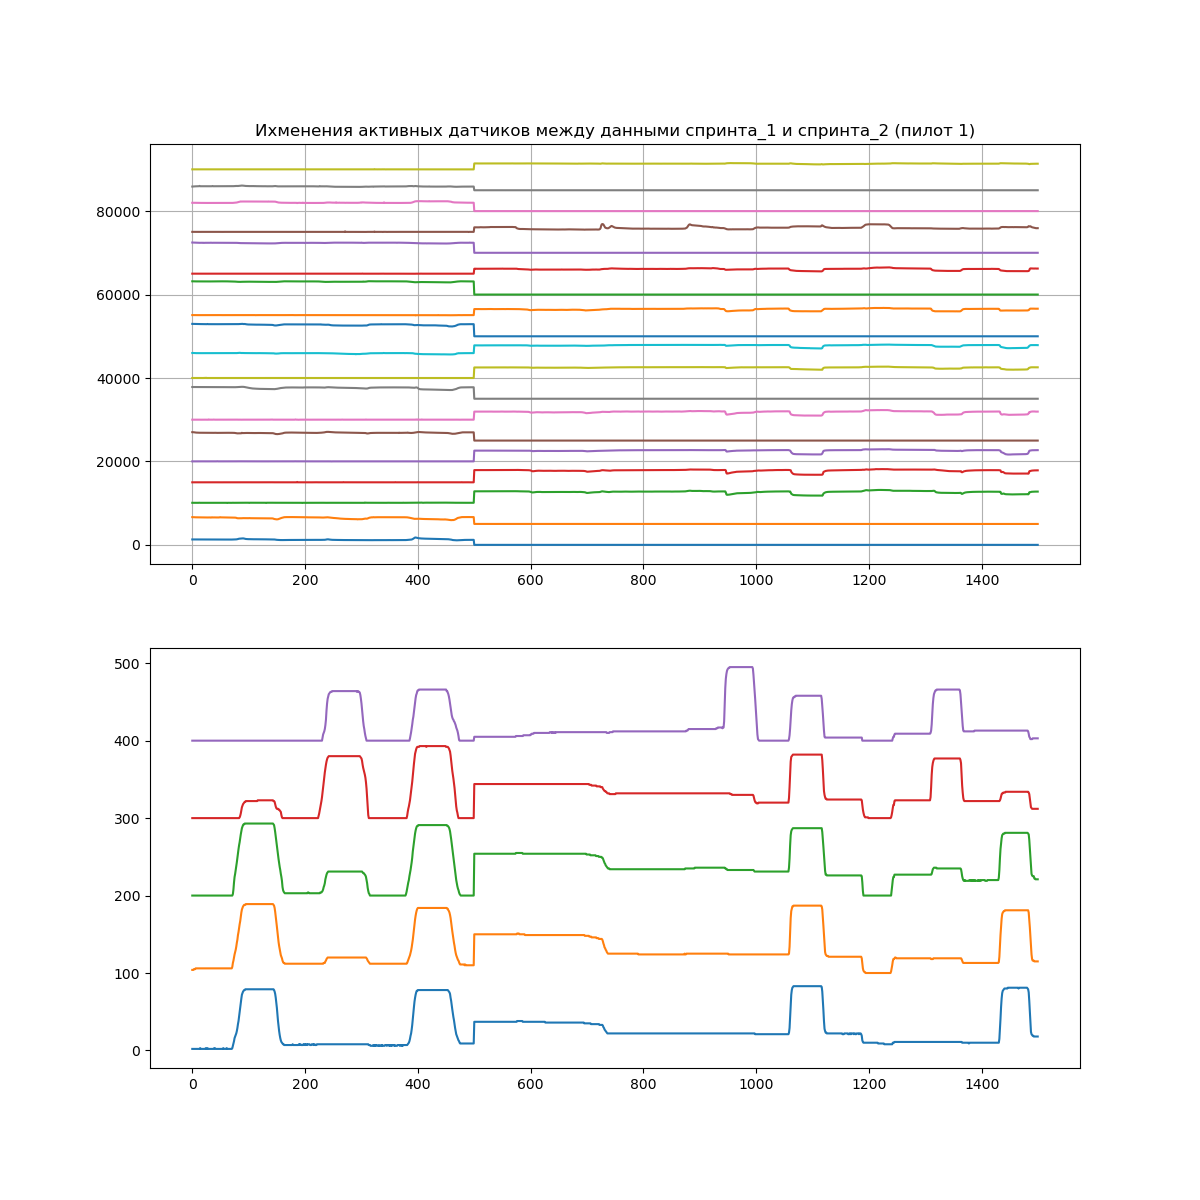

In [31]:
plt.clf()
plt.cla()
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(X_gestures[:,0][border_1[0]:border_1[1]])
ax[0].plot(X_gestures[:,2][border_1[0]:border_1[1]] + 5000)
ax[0].plot(X_gestures[:,3][border_1[0]:border_1[1]] + 10000)
ax[0].plot(X_gestures[:,4][border_1[0]:border_1[1]] + 15000)
ax[0].plot(X_gestures[:,6][border_1[0]:border_1[1]] + 20000)
ax[0].plot(X_gestures[:,8][border_1[0]:border_1[1]] + 25000)
ax[0].plot(X_gestures[:,13][border_1[0]:border_1[1]] + 30000)
ax[0].plot(X_gestures[:,15][border_1[0]:border_1[1]] + 35000)
ax[0].plot(X_gestures[:,16][border_1[0]:border_1[1]] + 40000)
ax[0].plot(X_gestures[:,17][border_1[0]:border_1[1]] + 45000)
ax[0].plot(X_gestures[:,19][border_1[0]:border_1[1]] + 50000)
ax[0].plot(X_gestures[:,22][border_1[0]:border_1[1]] + 55000)
ax[0].plot(X_gestures[:,24][border_1[0]:border_1[1]] + 60000)
ax[0].plot(X_gestures[:,28][border_1[0]:border_1[1]] + 65000)
ax[0].plot(X_gestures[:,29][border_1[0]:border_1[1]] + 70000)
ax[0].plot(X_gestures[:,31][border_1[0]:border_1[1]] + 75000)
ax[0].plot(X_gestures[:,33][border_1[0]:border_1[1]] + 80000)
ax[0].plot(X_gestures[:,36][border_1[0]:border_1[1]] + 85000)
ax[0].plot(X_gestures[:,39][border_1[0]:border_1[1]] + 90000)
ax[0].grid()
ax[0].set_title('Ихменения активных датчиков между данными спринта 1 и спринта 2 (пилот 1)')

ax[1].plot(y_gestures[:,0][border_1[0]:border_1[1]])
ax[1].plot(y_gestures[:,1][border_1[0]:border_1[1]] + 100)
ax[1].plot(y_gestures[:,2][border_1[0]:border_1[1]] + 200)
ax[1].plot(y_gestures[:,3][border_1[0]:border_1[1]] + 300)
ax[1].plot(y_gestures[:,4][border_1[0]:border_1[1]] + 400)

Text(0.5, 1.0, 'Примеры изменения поведения датчиков в зависимости от пилота(монтажа)\nOMG-3 теряет активность; OMG-27 приобретает активность; OMG-38 меняет характер изменений')

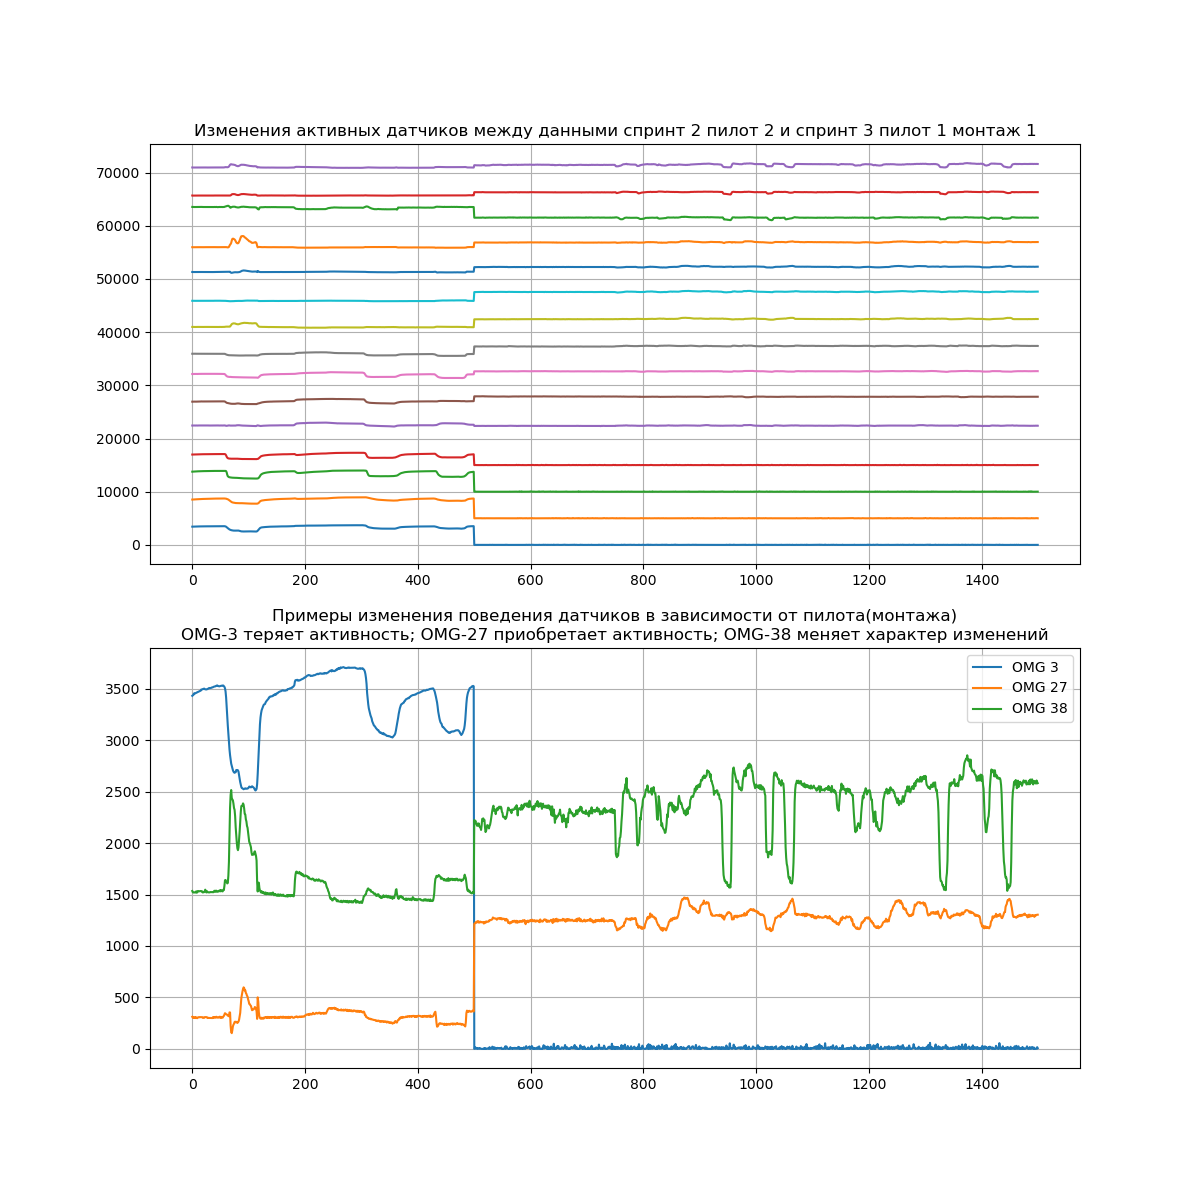

In [152]:
plt.clf()
plt.cla()
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(X_gestures[:,3][border_3[0]:border_3[1]])
ax[0].plot(X_gestures[:,4][border_3[0]:border_3[1]] + 5000)
ax[0].plot(X_gestures[:,5][border_3[0]:border_3[1]] + 10000)
ax[0].plot(X_gestures[:,6][border_3[0]:border_3[1]] + 15000)
ax[0].plot(X_gestures[:,12][border_3[0]:border_3[1]] + 20000)
ax[0].plot(X_gestures[:,13][border_3[0]:border_3[1]] + 25000)
ax[0].plot(X_gestures[:,16][border_3[0]:border_3[1]] + 30000)
ax[0].plot(X_gestures[:,17][border_3[0]:border_3[1]] + 35000)
ax[0].plot(X_gestures[:,21][border_3[0]:border_3[1]] + 40000)
ax[0].plot(X_gestures[:,22][border_3[0]:border_3[1]] + 45000)
ax[0].plot(X_gestures[:,27][border_3[0]:border_3[1]] + 50000)
ax[0].plot(X_gestures[:,28][border_3[0]:border_3[1]] + 55000)
ax[0].plot(X_gestures[:,30][border_3[0]:border_3[1]] + 60000)
ax[0].plot(X_gestures[:,31][border_3[0]:border_3[1]] + 65000)
ax[0].plot(X_gestures[:,38][border_3[0]:border_3[1]] + 70000)
ax[0].grid()
ax[0].set_title('Изменения активных датчиков между данными спринт 2 пилот 2 и спринт 3 пилот 1 монтаж 1')

ax[1].plot(X_gestures[:,3][border_3[0]:border_3[1]], label='OMG 3')
ax[1].plot(X_gestures[:,27][border_3[0]:border_3[1]] - 1000, label='OMG 27')
ax[1].plot(X_gestures[:,38][border_3[0]:border_3[1]] * 1.6, label='OMG 38')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Примеры изменения поведения датчиков в зависимости от пилота(монтажа)\nOMG-3 теряет активность; OMG-27 приобретает активность; OMG-38 меняет характер изменений')



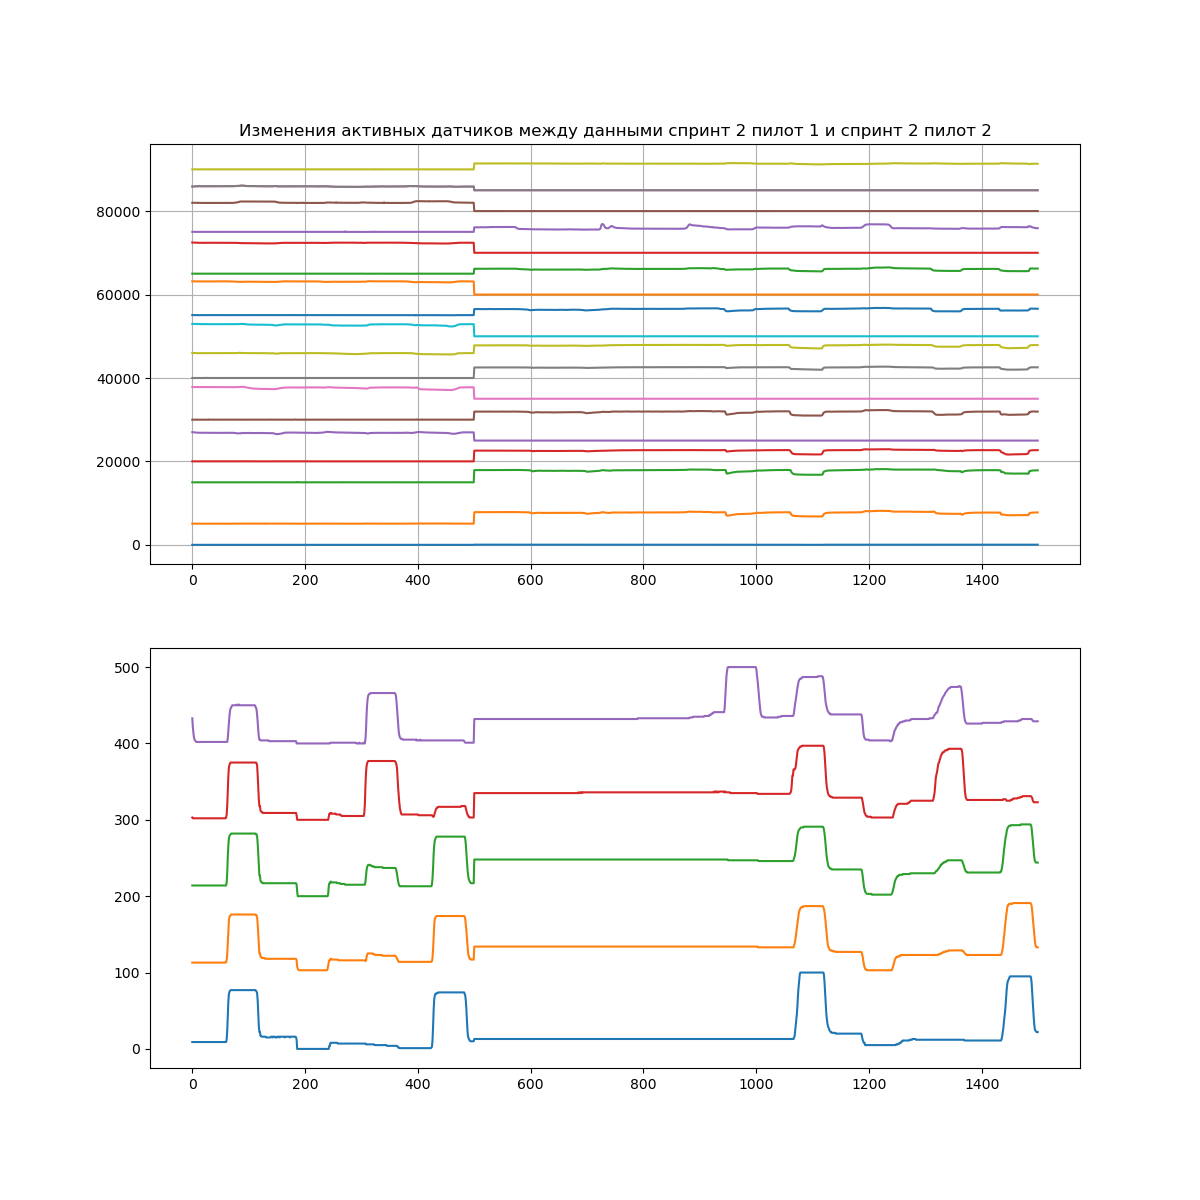

In [33]:
plt.clf()
plt.cla()
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(X_gestures[:,2][border_2[0]:border_2[1]])
ax[0].plot(X_gestures[:,3][border_1[0]:border_1[1]] + 5000)
ax[0].plot(X_gestures[:,4][border_1[0]:border_1[1]] + 15000)
ax[0].plot(X_gestures[:,6][border_1[0]:border_1[1]] + 20000)
ax[0].plot(X_gestures[:,8][border_1[0]:border_1[1]] + 25000)
ax[0].plot(X_gestures[:,13][border_1[0]:border_1[1]] + 30000)
ax[0].plot(X_gestures[:,15][border_1[0]:border_1[1]] + 35000)
ax[0].plot(X_gestures[:,16][border_1[0]:border_1[1]] + 40000)
ax[0].plot(X_gestures[:,17][border_1[0]:border_1[1]] + 45000)
ax[0].plot(X_gestures[:,19][border_1[0]:border_1[1]] + 50000)
ax[0].plot(X_gestures[:,22][border_1[0]:border_1[1]] + 55000)
ax[0].plot(X_gestures[:,24][border_1[0]:border_1[1]] + 60000)
ax[0].plot(X_gestures[:,28][border_1[0]:border_1[1]] + 65000)
ax[0].plot(X_gestures[:,29][border_1[0]:border_1[1]] + 70000)
ax[0].plot(X_gestures[:,31][border_1[0]:border_1[1]] + 75000)
ax[0].plot(X_gestures[:,33][border_1[0]:border_1[1]] + 80000)
ax[0].plot(X_gestures[:,36][border_1[0]:border_1[1]] + 85000)
ax[0].plot(X_gestures[:,36][border_1[0]:border_1[1]] + 85000)
ax[0].plot(X_gestures[:,39][border_1[0]:border_1[1]] + 90000)
ax[0].grid()
ax[0].set_title('Изменения активных датчиков между данными спринт 2 пилот 1 и спринт 2 пилот 2')

ax[1].plot(y_gestures[:,0][border_2[0]:border_2[1]])
ax[1].plot(y_gestures[:,1][border_2[0]:border_2[1]] + 100)
ax[1].plot(y_gestures[:,2][border_2[0]:border_2[1]] + 200)
ax[1].plot(y_gestures[:,3][border_2[0]:border_2[1]] + 300)
ax[1].plot(y_gestures[:,4][border_2[0]:border_2[1]] + 400);

In [ ]:

# Для предпроцессинга обучим классификатор (для определения действия/бездействия)
def get_diff(array, step=1, threshold=500):
    """_вычислятель изменений датчиков
        за step - шагов,
        с отсечением всего что ниже threshold - уровня_
    """
    new_array = np.zeros(array.shape[0])
    for i in np.arange(array.shape[0]):
        if i == 0:
            pass
        else:
            new_array[i] = np.sum(abs(array[i-step] - array[i]))
    new_array[new_array < threshold] = 0
    new_array[new_array > 0] = 1
    return new_array

X_all_diff = get_diff(X_all)
#X_all_diff_test = get_diff(X_all_test)

from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier().fit(X_all, X_all_diff)
X_all_class = ridge.predict(X_all)
#X_all_class_test = ridge.predict(X_all_test)
X_new = np.insert(X_all, -1, X_all_class, axis=1)
#X_new_test = np.insert(X_all_test, -1, X_all_class_test, axis=1)

X_train = X_new
y_train = y_all
#X_valid = X_new_test
#y_valid = y_all_test

X_train.shape, y_train.shape

In [2]:
# ~ 18.5s
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoLars
from sklearn.ensemble import VotingRegressor

estimators = [
    ('dt', DecisionTreeRegressor()),('ll', LassoLars(alpha=0.1))
]
model_vr = MultiOutputRegressor(VotingRegressor(estimators=estimators, weights=[0.45, 0.55])).fit(X_train, y_train)

In [3]:
# ~ 20s
import xgboost as xgb

# параметры оптимизированы optun'ой
params = {'learning_rate': 0.06329973864656831,
 'max_depth': 6,
 'subsample': 0.9814063371832862,
 'colsample_bytree': 0.41087811860602663,
 'min_child_weight': 8}

model_xgb = xgb.XGBRegressor(**params)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.41087811860602663, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06329973864656831,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [4]:
# ~ 26s
import xgboost as xgb

# raw model
model_xgb_raw = xgb.XGBRegressor()
model_xgb_raw.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [5]:

# ~ 0.1s
df_sim = read_omg_csv('sprint2_pilote1_gestures.palm').iloc[:10000]
#df_sim = read_omg_csv('sprint2_pilote2_gestures.palm').iloc[20000:]
#df_sim = read_omg_csv('sprint2_pilote1_fingers.palm').iloc[:10000]
#df_sim = read_omg_csv('sprint2_pilote2_fingers.palm').iloc[:10000]
df_sim.shape

(10000, 65)

In [6]:
# ~ 0.1s
import time
import serial
from IPython.display import clear_output

crc_table = [
    54, 181, 83, 241, 89, 16, 164, 217, 34, 169, 220, 160, 11, 252,
    111, 241, 33, 70, 99, 240, 234, 215, 60, 206, 68, 126, 152, 81,
    113, 187, 14, 21, 164, 172, 251, 16, 248, 215, 236, 90, 49, 53,
    179, 156, 101, 55, 65, 130, 161, 22, 218, 79, 24, 168, 152, 205,
    115, 141, 23, 86, 141, 58, 122, 215, 252, 48, 69, 115, 138, 66,
    88, 37, 63, 104, 176, 46, 139, 246, 222, 184, 103, 92, 154, 174,
    97, 141, 195, 166, 227, 150, 140, 48, 121, 243, 13, 131, 210, 199,
    45, 75, 180, 104, 97, 82, 251, 90, 132, 111, 229, 175, 146, 216,
    153, 86, 166, 33, 184, 100, 225, 248, 186, 54, 89, 39, 2, 214, 2,
    114, 197, 6, 35, 188, 245, 64, 220, 37, 123, 132, 190, 60, 189, 53,
    215, 185, 238, 145, 99, 226, 79, 54, 102, 118, 210, 116, 51, 247,
    0, 191, 42, 45, 2, 132, 106, 52, 63, 159, 229, 157, 78, 165, 50,
    18, 108, 193, 166, 253, 3, 243, 126, 111, 199, 152, 36, 114, 147,
    57, 87, 14, 16, 160, 128, 97, 189, 51, 115, 142, 8, 70, 71, 55, 42,
    193, 65, 207, 122, 158, 26, 21, 72, 139, 33, 230, 230, 116, 134, 5,
    213, 165, 107, 41, 134, 219, 190, 26, 29, 136, 174, 190, 108, 185, 172,
    137, 239, 164, 208, 207, 206, 98, 207, 12, 0, 174, 64, 20, 90, 49, 12,
    67, 112, 109, 78, 114, 165, 244, 183, 121
];
    
def get_crc(data, count):
    result = 0x00
    l = count
    while (count>0):   
        result = crc_table[result ^ data[l-count]]
        count -= 1;
    return result;

def drv_abs_one(ser, control):
    if ser is None:
        return
    pack = (np.array([80, 0x01, 0xBB, 6] + [c for c in control] + [0], dtype='uint8'))
    pack[-1] = get_crc(pack[1:], 9)
    return (pack, ser.write(bytearray(pack)))

## Что сделано:

* Данные для моделированния - последовательно соединённые данные 2-х пилотов (train протокольных жестов и free_movements), дополнительно вручную нарезанные на train и valid

* Подготовлены к работе **2 модели** (`VotingRegressor`, `XGBRegressor`)

* Предпроцессинг - **добавляем 1 фичу** (которая является флагом действия/бездействия)

* Постпроцессинг:

* * **дискретизация таргетов** на заданное количество диапазонов (по умолчанию 20 диапазон, по 5 единиц в каждом) 

* * **экспоненциальный сглаживатель пиков** с повторным применением дискретизации (как-будто если сделать это пару раз, можно добиться сглаживания без длинных окон)

* * **сглаживатель пиков** по предыдущим показаниям с шагом 3 и 4 (по умолчанию шаг 3) даёт задержку между предсказанием и выводом на протез в 1 временной шаг

In [7]:
# ~ 0.1s
from sklearn.metrics import mean_squared_error as mse
import collections # нужно для deque (очередь нужна чтобы хранить пред-предыдущее предсказание)

def MSE(y, y_pred):
    """_получение среднеквадратичной ошибки для каждого таргета_

    """
    ENC0 = mse(y[:,0], y_pred[:,0])
    ENC1 = mse(y[:,1], y_pred[:,1])
    ENC2 = mse(y[:,2], y_pred[:,2])
    ENC3 = mse(y[:,3], y_pred[:,3])
    ENC4 = mse(y[:,4], y_pred[:,4])
    ENC5 = mse(y[:,5], y_pred[:,5])
    return pd.Series([ENC0, ENC1, ENC2, ENC3, ENC4, ENC5])

def preprocessing(x):
    """_добавление идентификатора действия/бездействия_
    """  
    return np.append(x, ridge.predict([x]))

def inference(x):
    """_предикт по одной из моделей_
    """
    #y = model_vr.predict([x])[0]
    y = model_xgb.predict([x])[0]
    #y = model_xgb_raw.predict([x])[0]
    return y

def postprocessing(array, step=10):
    """_дискретизация выходных сигналов по 100/step количеству уровней
        по умолчанию step=10 -> 10 уровней сигналов_
    """
    array[array < 0] = 0
    array = np.round(array / step, 0).astype(int) * step
    return array

def commands(x, prev):
    """_сглаживатель пиков по 2-м предыдущим шагам_
    """
    if prev is None:
        y = x
    else:
        y = x*0.5 + prev*0.5 # Holt-Winters filter
    return postprocessing(y)

#def commands(dq):
    """_сглаживатель пиков по 2-м предыдущим шагам_
    """
    if len(dq) < 2:
        return np.zeros(6)
    else:
        if (dq[-1] == dq[0]).any():
            dq[1][dq[-1] == dq[0]] = dq[0][dq[-1] == dq[0]]
    return dq[-1]

#def moving_average(dq, n=4):
    ret = np.cumsum(dq, dtype=float, axis=1)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [8]:
TIMEOUT = 0.066 # на исходном значении 0,033мс запускается раз через раз 
                #(хотя цикл вычислений на самой медленной модели занимает в среднем 0,021мс)
DEBUG = False
    
i = 0
ts_old = time.time()
ts_diff = 0;

#dq = collections.deque(maxlen=4)
y_prev = None


y_dct = {
    'omg_sample':[],
    'enc_sample':[],
    'sample_preprocessed':[],
    
    'y_predicted':[],
    'y_postprocessed':[],
    'y_commands':[],
    #'y_roll':[]
}
while True:    
    
    # [Data reading]
    ts_start = time.time()
    
    try:
        # [Sim data]
        if i < len(df_sim):
            sample = df_sim.values[i]
        else:
            break
        # [/Sim data]
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed   = postprocessing(y_predicted)
    # [/Inference Postprocessing]
        
    # [Commands composition]
    y_commands          = commands(y_postprocessed, y_prev)
    # [/Commands composition]
    
    #y_roll = moving_average(dq)
    
    # [Commands sending]
    # NO COMMANDS SENDING IN SIMULATION
    # [/Commands sending]
    
    # [Data logging]
    y_dct['omg_sample'].append(omg_sample)
    y_dct['enc_sample'].append(enc_sample)
    y_dct['sample_preprocessed'].append(sample_preprocessed)
    y_dct['y_predicted'].append(y_predicted)
    y_dct['y_postprocessed'].append(y_postprocessed)
    y_dct['y_commands'].append(y_commands)
    #y_dct['y_roll'].append(y_roll)
    # [/Data logging]

   
    y_prev = y_postprocessed
    #dq.append(y_commands)
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 

In [9]:
for key, val in y_dct.items():
    # print(f"len({key}) = {len(y_dct[key])}")
    y_dct[key] = np.stack(val)
    print(f"{key}.shape = {y_dct[key].shape}")
    
metrics_test = {col : mse(y_dct['enc_sample'][:,col], y_dct['y_commands'][:,col]) for col in np.arange(6)}

metrics_test = pd.Series(metrics_test)
metrics_test

omg_sample.shape = (10000, 50)
enc_sample.shape = (10000, 6)
sample_preprocessed.shape = (10000, 51)
y_predicted.shape = (10000, 6)
y_postprocessed.shape = (10000, 6)
y_commands.shape = (10000, 6)


0     41.6263
1     34.0267
2     40.3520
3     43.3706
4    122.6701
5      0.0000
dtype: float64

### Online (prosthesis or virtual hand)

In [10]:
TIMEOUT = 0.066
DEBUG = True

dq = collections.deque(maxlen=3)

ser = None
# ser_port = None
ser_port = '/dev/cu.usbmodem3498365F31351'

if ser_port is not None:
    ser = serial.Serial(port=ser_port, timeout=2*TIMEOUT)
    ser.write('T1#\r\n'.encode('utf-8')) # T1 for Timestamp activate
    ser.write('M2#\r\n'.encode('utf-8')) # M2 for Mode == 2 = send samples
    ser.write('S2#\r\n'.encode('utf-8')) # SYNC to 2 for sanity check

    # flush buffers
    ser.reset_input_buffer()
    ser.read()
    
    i = 0;
    while(ser.in_waiting):
        print(f'Flushing buffers {i}: {ser.in_waiting}', end='    \r')
        ser.read_all()
        time.sleep(0.005)
        i+=1;
    ser.readline()
    ser.readline()
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_previous = None
while True:    
    
    # [Data reading]
    s = ser.readline()
    ts_start = time.time()
    
    try:
        sample = np.array(s.decode('UTF-8')\
                           .replace('\r\n', "")\
                           .split(' ')
                         ).astype(int)
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(dq)
    # [/Commands composition]
    
    # [Commands sending]
    pack, _ = drv_abs_one(ser, list(y_commands)); # + [0]
    # [/Commands sending]
    
    dq.append(y_postprocessed)
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: iteration should increase monotonically, TIMEDIFF approximately 32-34 ms, CYCLETIME < TIMEOUT, WAITING should be == 0
        print(f'ITERATION:\t{i}\tTIMEDIFF:\t{(ts_start - ts_old)*1000: .0f}\tCYCLETIME:\t{ts_diff*1000:.0f}\tWAITING:\t{ser.in_waiting}')
        print('INPUT:\n', s)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
        print(pack)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 

SerialException: [Errno 2] could not open port /dev/cu.usbmodem3498365F31351: [Errno 2] No such file or directory: '/dev/cu.usbmodem3498365F31351'